
Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc. The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. Download the data in the same folder and run the following commmand to get it in the environment


# Import Libraries

In [1]:
# Importing required Libraries
import sqlite3
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import pickle

D:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load dataset.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
# Defining Target variable
target = df.pop('overall_rating')
target.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [4]:
df.shape

(183978, 41)

In [5]:
# Imputing target funtion :
target.isnull().values.sum()

836

In [6]:
target.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

<IPython.core.display.Javascript object>


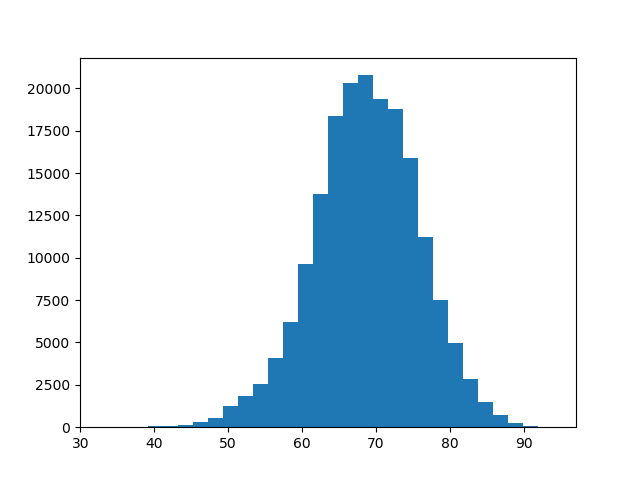

D:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.5000e+01, 9.4000e+01,
        1.4200e+02, 2.9400e+02, 5.2600e+02, 1.2510e+03, 1.8450e+03,
        2.5780e+03, 4.0870e+03, 6.1890e+03, 9.6500e+03, 1.3745e+04,
        1.8366e+04, 2.0310e+04, 2.0773e+04, 1.9382e+04, 1.8784e+04,
        1.5915e+04, 1.1254e+04, 7.5250e+03, 4.9470e+03, 2.8290e+03,
        1.4590e+03, 7.4800e+02, 2.2800e+02, 8.4000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <a list of 30 Patch objects>)

In [7]:
# Histogram of the target variable
plt.hist(target, 30, range=(33, 94))

In [8]:
# filling the missing values with mean of the target variable
y = target.fillna(target.mean())
y

0         67.0
1         67.0
2         62.0
3         61.0
4         61.0
5         74.0
6         74.0
7         73.0
8         73.0
9         73.0
10        73.0
11        74.0
12        73.0
13        71.0
14        71.0
15        71.0
16        70.0
17        70.0
18        70.0
19        70.0
20        70.0
21        70.0
22        69.0
23        69.0
24        69.0
25        69.0
26        69.0
27        69.0
28        69.0
29        68.0
          ... 
183948    68.0
183949    68.0
183950    68.0
183951    67.0
183952    67.0
183953    68.0
183954    68.0
183955    68.0
183956    68.0
183957    67.0
183958    67.0
183959    67.0
183960    67.0
183961    67.0
183962    67.0
183963    70.0
183964    70.0
183965    72.0
183966    75.0
183967    78.0
183968    78.0
183969    81.0
183970    81.0
183971    81.0
183972    83.0
183973    83.0
183974    78.0
183975    77.0
183976    78.0
183977    80.0
Name: overall_rating, Length: 183978, dtype: float64

In [9]:
# filling the missing values with mean of the target variable
y = target.fillna(target.mean())

In [10]:
# Checking for null values in target variable
y.isnull().sum()

0

In [ ]:
Data exploration

In [11]:
# Displaying all the columns of the data frame
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 41 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
sprint

In [13]:
# one hot encoding for dummy categorical columns
df_dummy = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
df_dummy.head()

,id,player_fifa_api_id,player_api_id,date,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,66.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 67 columns):
id                            183978 non-null int64
player_fifa_api_id            183978 non-null int64
player_api_id                 183978 non-null int64
date                          183978 non-null object
potential                     183142 non-null float64
crossing                      183142 non-null float64
finishing                     183142 non-null float64
heading_accuracy              183142 non-null float64
short_passing                 183142 non-null float64
volleys                       181265 non-null float64
dribbling                     183142 non-null float64
curve                         181265 non-null float64
free_kick_accuracy            183142 non-null float64
long_passing                  183142 non-null float64
ball_control                  183142 non-null float64
acceleration                  183142 non-null float64
sprint_speed                  18

In [15]:
#Making the X variable as independent variable list
X = df_dummy.drop(['id', 'date'], axis=1)
X

,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,218353,505942,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,...,0,0,0,0,0,0,1,0,0,0
1,218353,505942,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,...,0,0,0,0,0,0,1,0,0,0
2,218353,505942,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,...,0,0,0,0,0,0,1,0,0,0
3,218353,505942,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,...,0,0,0,0,0,0,1,0,0,0
4,218353,505942,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,...,0,0,0,0,0,0,1,0,0,0
5,189615,155782,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,...,0,0,0,0,0,0,1,0,0,0
6,189615,155782,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,...,0,0,0,0,0,0,1,0,0,0
7,189615,155782,75.0,79.0,52.0,57.0,70.0,29.0,71.0,68.0,...,0,0,0,0,0,0,1,0,0,0
8,189615,155782,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,...,0,0,0,0,0,0,1,0,0,0
9,189615,155782,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
Feature selection 

In [16]:
# Splitting the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
#imputing null value of each column with the mean of that column
imput = Imputer()
X_train = imput.fit_transform(X_train)
X_test = imput.fit_transform(X_test)

In [18]:
#finding feature_importance for feature selection. from it we'll be able to decide threshold value
model = XGBRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)

D:\Users\dell\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0.05115651 0.02897777 0.13911739 0.02826106 0.00595768 0.04332646
 0.01590659 0.         0.01287898 0.         0.         0.00348626
 0.13141693 0.00436716 0.0058711  0.0065089  0.16110069 0.
 0.05513685 0.0040621  0.00863542 0.03761797 0.00898127 0.0139806
 0.01894557 0.02671051 0.0015188  0.         0.03219567 0.0530614
 0.00176505 0.02725989 0.02712863 0.01008714 0.02617038 0.00840923
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [19]:
selection = SelectFromModel(model, threshold=0.01, prefit=True)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

In [20]:
#finding feature_importance for feature selection. from it we'll be able to decide threshold value
model = XGBRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)

D:\Users\dell\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0.05115651 0.02897777 0.13911739 0.02826106 0.00595768 0.04332646
 0.01590659 0.         0.01287898 0.         0.         0.00348626
 0.13141693 0.00436716 0.0058711  0.0065089  0.16110069 0.
 0.05513685 0.0040621  0.00863542 0.03761797 0.00898127 0.0139806
 0.01894557 0.02671051 0.0015188  0.         0.03219567 0.0530614
 0.00176505 0.02725989 0.02712863 0.01008714 0.02617038 0.00840923
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [21]:
selection = SelectFromModel(model, threshold=0.01, prefit=True)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

In [22]:
select_X_train.shape

(137983, 20)

In [ ]:
Training data using Linear Regression

In [23]:
#preprocessing(standard scalling), estimator(linear regression)
pline = make_pipeline(StandardScaler(),LinearRegression())  
 #defining type of cross_validation(shuffle spliting)
cross_val = ShuffleSplit(random_state=0)  
#parameters for model tunning
param_grid = {'linearregression__n_jobs': [50]}     
grid = GridSearchCV(pline, param_grid=param_grid, cv=cross_val)

In [24]:
#training data set
grid.fit(select_X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'linearregression__n_jobs': [50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
grid.best_params_

{'linearregression__n_jobs': 50}

In [26]:
lin_reg = pickle.dumps(grid)

In [27]:
lin_reg = pickle.loads(lin_reg)

In [28]:
print("""Linear Regressor accuracy is {lin}""".format(lin=lin_reg.score(select_X_test, y_test)))

Linear Regressor accuracy is 0.8536768959300971
